In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

### 1. Activation Functions


Let's start by writing some functions for activation functions that we would like to be able to use.

Fill in the functions below to implement the associated activation functions. Any time you need a special function (e.g. exponentation), try to find a version in NumPy so that your activation functions will work on single values as well as arrays.

*bonus*: try to implment the ReLU activation function so that it works elementwise on a NumPy -- this is called "vectorizing" your code. Hint: check out the `np.where` function.

In [23]:
def linear(z):
  '''
  linear activation function
  '''
  return z

# more specifically, the logistic sigmoid that has values between 0 and 1
def sigmoid(z):
    '''
    sigmoid activation function
    '''
    return 1 / (1 + np.exp(-np.array(z)))


def tanh(z):
    '''
    tanh activation function
    '''
    return np.tanh(z)
    

def relu(z):
    return np.maximum(0,z)

In [8]:
a = np.array([-1.0, 0.0, 1.0])

np.testing.assert_equal(linear(5), 5)
np.testing.assert_equal(linear(-3.0), -3.0)
np.testing.assert_array_equal(linear(a), a)

np.testing.assert_equal(sigmoid(0.0), 0.5)
np.testing.assert_allclose(sigmoid(a), [0.26894142, 0.5, 0.73105858])

np.testing.assert_equal(tanh(0.0), 0.0)
np.testing.assert_allclose(tanh(a), [-0.76159416, 0.0, 0.76159416])

np.testing.assert_equal(relu(5), 5)
np.testing.assert_equal(relu(-5), 0)

### 2. Try it out

Let's reuse our neural net layer function from last time.


In [9]:
def nn_layer(X, W, b, f):
  return f(np.dot(X, W) + b)

In [10]:
def nn_two_layers(X, W_1, b_1, f_1, W_2, b_2, f_2):
  H = nn_layer(X, W_1, b_1, f_1)
  Y_hat = nn_layer(H, W_2, b_2, f_2)
  return Y_hat

But now, we have multiple activation functions to try out. As we did previously, create randomized weight matrices for a network with scalar input, scalar output and any number of hidden nodes in a single layer. Generate plots of this input output relationships.

This time, try out different activation functions: linear, sigmoid, tanh, relu and visualize the results.

In [11]:
# Set the input dimension, the number of hidden units, and the number of ouptput units
n_input, n_hidden, n_output = 1, 15, 1

# We want get the NN's output for a range of input values, so that we cant plot
# input vs output. We can get evenly space values using `np.linspace`. We also
# want to process these inputs as a "batch", so we use `np.newaxis` to turn this
# 1-d array into a 2-d array with a single column.
n_grid = 100
X = np.linspace(-10, 10, n_grid)[:, np.newaxis]

# We can generate random values (drawn from a standard gaussian distribution --
# mean = 0, standard deviation = 1), with `np.random.randn(shape)`
W_1 = np.random.randn(n_input, n_hidden)
b_1 = np.random.randn(n_hidden)
W_2 = np.random.randn(n_hidden, n_output)
b_2 = np.random.randn(n_output)


<function matplotlib.pyplot.show(*args, **kw)>

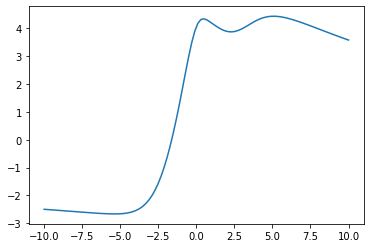

In [20]:
Y_hat = nn_two_layers(X, W_1, b_1, tanh, W_2, b_2, linear)

plt.plot(X ,Y_hat)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

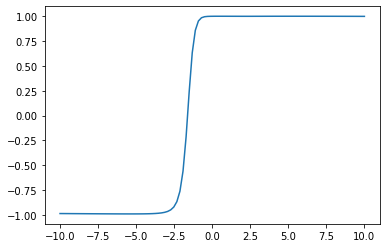

In [21]:
Y_hat = nn_two_layers(X, W_1, b_1, tanh, W_2, b_2, tanh)

plt.plot(X ,Y_hat)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

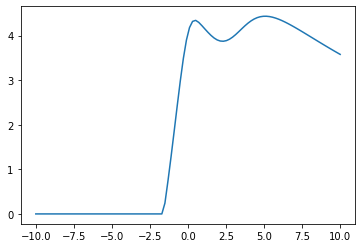

In [24]:
Y_hat = nn_two_layers(X, W_1, b_1, tanh, W_2, b_2, relu)

plt.plot(X ,Y_hat)
plt.show()

### 3.  Outputs and Losses

Next, we'll define some common Output activation functions

In [25]:
def sigmoid(z):
  '''
  sigmoid output function
  '''
  return 1 / (1 + np.exp(-np.array(z)))

def softmax(z):
    '''
    softmax output function
    '''
    row_sums = (np.exp(z).sum(axis=1))[:,np.newaxis]
    return np.exp(z) / row_sums

In [26]:
np.testing.assert_almost_equal(
    sigmoid(2),
    np.array([.88]),
    decimal=2
)

np.testing.assert_almost_equal(
    sigmoid(np.array([2,-2,1,-1])),
    np.array([.88, .12, .73, .27]),
    decimal=2
)

np.testing.assert_almost_equal(
    softmax(np.array([[2,5,1], [3,1,1]])),
    np.array([[0.046, 0.93, 0.017],
       [0.78, 0.10, 0.10]]),
    decimal=2
)

Next, we'll define some common Loss functions.

In [35]:
def squared_error(y_hat, y_true):
  '''
  squared error loss
  '''
  return ((y_hat-y_true)**2)


def binary_crossentropy(y_hat, y_true):
  '''
  binary crossentropy loss for label-encoded inputs
  '''
  return - y_true*np.log(y_hat) - (1-y_true)*np.log(1 - y_hat)


def binary_crossentropy_onehot(y_hat, y_true):
  '''
  binary crossentropy loss for onehot-encoded inputs
  '''
  return - (y_true*np.log(y_hat)).sum(axis=1)


def categorical_crossentropy(y_hat, y_true):
  '''
  categorical crossentropy loss for onehot-encoded inputs
  '''
  return - (y_true*np.log(y_hat)).sum(axis=1)


In [36]:
np.testing.assert_equal(
    squared_error(np.array([1,2,4]), np.array([5,4,3])),
    np.array([16, 4, 1])
)


np.testing.assert_almost_equal(
    binary_crossentropy(
        np.array([.51, .49, .99, 0.01, .99 ]), 
        np.array([1, 1, 1, 1, 0])),
    np.array([0.67, 0.71, 0.01, 4.60, 4.60]),
    decimal=2
)

np.testing.assert_almost_equal(
    binary_crossentropy_onehot(
        np.array([[.49, .51], [.51, .49], [.01, .99], [0.99, .01], [.01, .99] ]), 
        np.array([[0, 1], [0, 1], [0, 1], [0, 1], [1, 0]])),
    np.array([0.67, 0.71, 0.01, 4.60, 4.60]),
    decimal=2
)

np.testing.assert_almost_equal(
      categorical_crossentropy(
        np.array([[.4, .5, .1], [.2, .2, .6]  ]), 
        np.array([[0, 1, 0], [0, 1, 0],])),
    np.array([0.69, 1.6]),
    decimal=2
)



###4. Discussion problem with your groups

Suppose we want to predict if a person is a credit risk (Yes or No) based on their {Income, Age, YearsOfEducation}. Draw a diagram of a possible neural network (with one hidden layer) to fit a datset like this. 
* How many input nodes and output nodes are there?
* Pick how many nodes are in the hidden layer. Pick an activation function in the hidden layer. Include bias nodes at the hidden layer and the output layer.
* What activation function would you pick for the output layer?
* What loss function would you pick for fitting this model?
* How many total free parameters are in this network? 
* Write an equation for the output of this network as a function of its input.

1. There are 3 input nodes, and 1 output node.

2. I would pick 3 hidden nodes in the hidden layer. And I pick ReLU as the activation function.

3. I would pick sigmiod function for output layer since the output is binary(yes or no).

4. I would pick binary cross entropy as the loss function.

5. There are 9 weights from the input nodes to the hidden layer, 3 weights from the hidden layer to the output node, and 4 bias nodes. Thus, a total of 16 free parameters.

6. Please see the equation in the below picture.

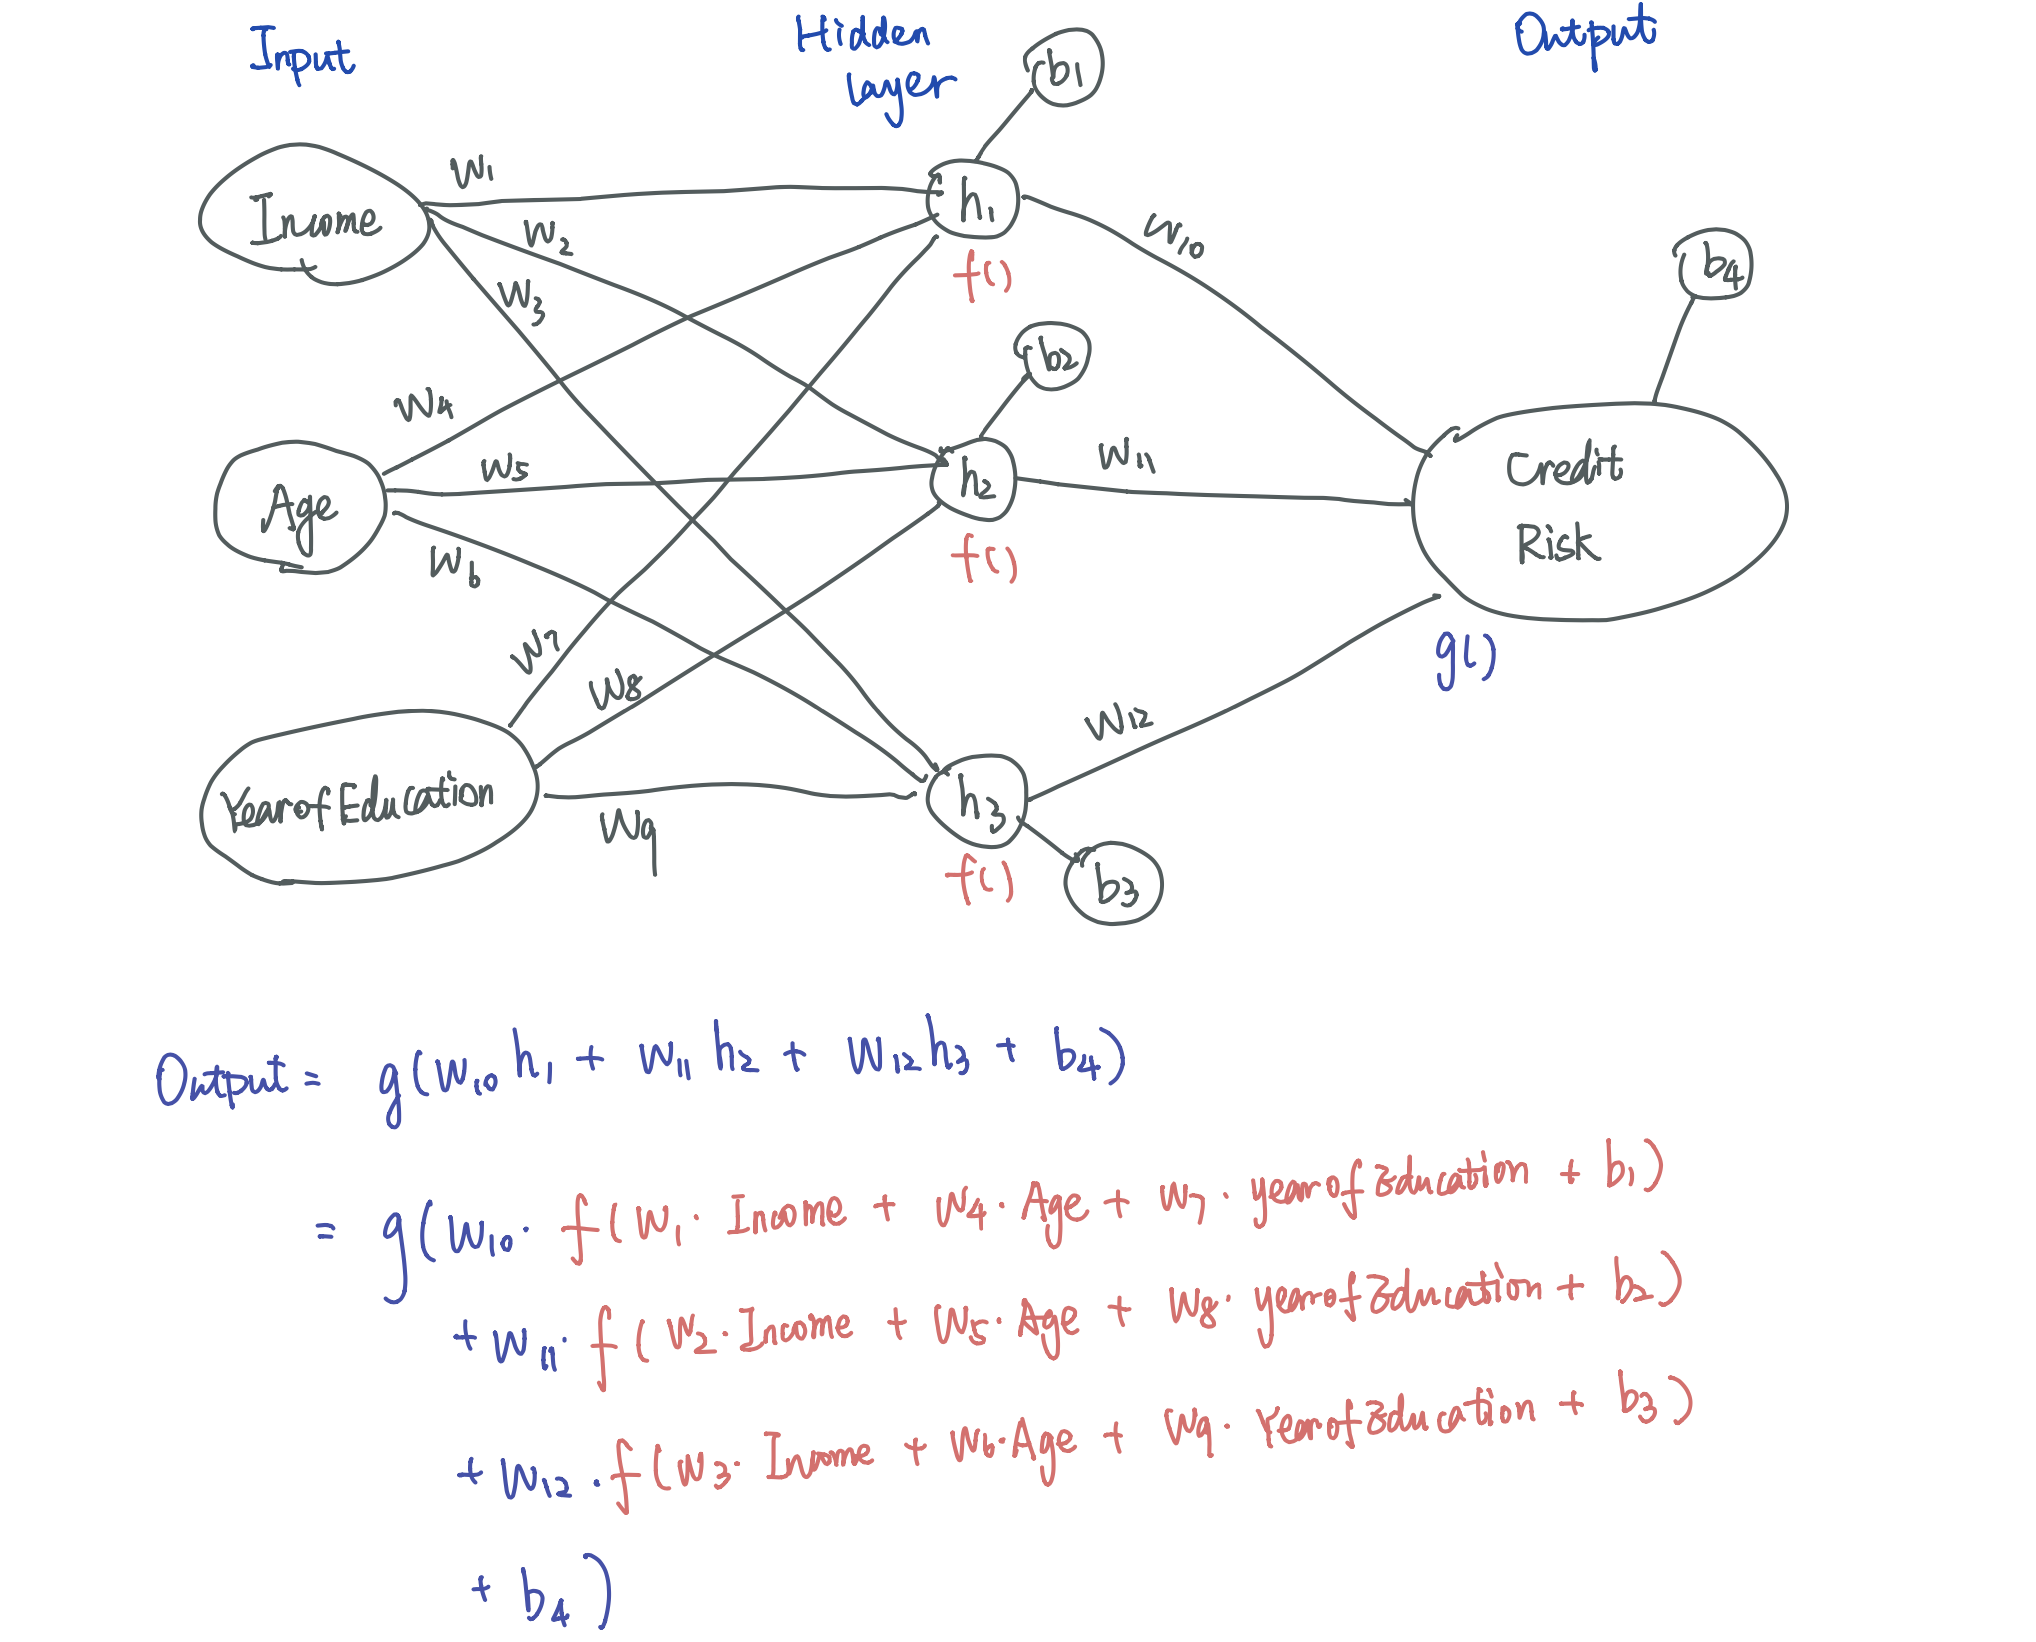